# Introduction to TensorFlow
------------------
### Contents:
- Tensors
    - Rank, shape, converting to/from NumPy, indexing
    - Variables
    - Placement on CPU/GPU device
- TensorFlow: Basic tensor operations and computation/dataflow graphs
    - Operations - tf.math, tf.linalg, tf.random
    - Eager execution
    - Computation graphs
    - Graph execution
        - TF1.x: sessions
        - TF2.x: functions
    - Differences between TF1.x and TF2.x
- TF datasets
    - Creating TF datasets
    - Passing datasets through a function
- Automatic differentiation
    - tf.GradientTape
- 2D convolutions (with fixed filters)
    - Using the raw tf convolution operation

In [1]:
!nvidia-smi

Wed Nov  9 14:28:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000004:04:00.0 Off |                    0 |
| N/A   34C    P0    36W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### ** Make sure you have a GPU available for this session! **

----------------------
# [Section] Tensors

In [2]:
import tensorflow as tf # may take ~10-15s
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.1


### What does a 3D/rank-3 tensor look like?

![Tensor Rank 3](./resources/tensor_rank_3.jpg)

In [3]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


2022-11-09 14:29:03.110105: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13867 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0004:04:00.0, compute capability: 7.0


### What properties does a tensor have?

**Shape:** The length (number of elements) of each of the axes of a tensor.

**Rank:** Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.

**Axis or Dimension:** A particular dimension of a tensor.

**Size:** The total number of items in the tensor, the product of the shape vector's elements.

In [4]:
print("Type of every element:", rank_3_tensor.dtype)
print("Number of axes:", rank_3_tensor.ndim)
print("Shape of tensor:", rank_3_tensor.shape)
print("Elements along axis 0 of tensor:", rank_3_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_3_tensor.shape[-1])
print("Total number of elements:", int(tf.size(rank_3_tensor)))

Type of every element: <dtype: 'int32'>
Number of axes: 3
Shape of tensor: (3, 2, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements: 30


### What does a 4D/rank-4 tensor look like?

In tensorflow, image data is typically assumed to be 4D i.e. rank 4.

![Tensor Rank 4](./resources/tensor_rank_4.jpg)


![Tensor Rank 4 Meaning](./resources/tensor_rank_4_meaning.jpg)

In [5]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", int(tf.size(rank_4_tensor)))

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


### Manipulating the shape of a tensor

In [6]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


### Converting to/from NumPy

As you may have noticed, a TensorFlow ```tensor``` is very similar to a Numpy ```ndarray```.

**The key difference between tensors and NumPy arrays is that tensors have accelerator support like GPU and TPU and are immutable (i.e. cannot be updated once created).** (A special type of tensor, called variable, can be assgined new values. We will see them later in the lab.)

**Most of the time, tf.Tensor and np.ndarray can be automatically inter-converted:**

- TensorFlow operations automatically convert NumPy ndarrays to Tensors.
- NumPy operations automatically convert Tensors to NumPy ndarrays.

If needed, you can explicitly convert tensors to NumPy ndarrays using their .numpy() method.

In [7]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically:")
tensor = tf.multiply(ndarray, 42)
print(tensor)

print("Vice-versa, NumPy operations convert Tensors to numpy arrays automatically:")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array:")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically:
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
Vice-versa, NumPy operations convert Tensors to numpy arrays automatically:
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array:
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


Read more: https://www.kdnuggets.com/2022/05/everything-need-know-tensors.html

### Indexing - single-axis

In [8]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [9]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


### Indexing - multi-axis

In [10]:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [11]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



Read more: https://www.tensorflow.org/guide/tensor_slicing

### Variables - a special type of tensor

A TensorFlow ```variable``` is the recommended way to represent shared, persistent state your program manipulates. Variables are created and tracked via the ```tf.Variable``` class. A ```tf.Variable``` represents a tensor whose value can be changed through various operations. A variable looks and acts like a tensor, and, in fact, is a data structure backed by a ```tf.Tensor```. Like tensors, they have a dtype and a shape, and can be exported to NumPy. Variables can also be named which can help you track and debug them.

**Remember - A tensor can be assigned value only once and cannot be updated. TF tensors, like python numbers and strings, are immutable and can only be created new. In case your objective is to update the value of the tensor, then you need to use a ```variable```.**

In [14]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor, name="ABCD")

print(my_variable)
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

<tf.Variable 'ABCD:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>
Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


#### Let's try editing the value of the ```constant``` tensor:

In [16]:
my_tensor[:,0] = [-1, -1] # cannot modify

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [17]:
my_tensor.assign([[-1, -2],[-3, -4]])

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

#### Next, let's try editing the value of the ```variable``` tensor:

In [18]:
my_variable.assign([[-1, -2],[-3, -4]])

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[-1., -2.],
       [-3., -4.]], dtype=float32)>

In [19]:
my_variable

<tf.Variable 'ABCD:0' shape=(2, 2) dtype=float32, numpy=
array([[-1., -2.],
       [-3., -4.]], dtype=float32)>

Specific operations allow you to read and modify the values of this tensor. Higher level libraries like ```tf.keras``` use ```tf.Variable``` to store model parameters. Read more - https://www.tensorflow.org/guide/variable

### Placing tensors on devices (CPUs, GPUs)

For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible with its dtype. This means most variables are placed on a GPU if one is available.

In [20]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is the Tensor on GPU #0:  
True


It's possible to set the location of a variable or tensor on one device and do the computation on another device. This will introduce delay, as data needs to be copied between the devices.

In [23]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [24]:
with tf.device('CPU:0'):
    a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.Variable([[1.0, 2.0, 3.0]])
    print(a.device, b.device)

with tf.device('GPU:0'):
    # Element-wise multiply
    k = a * b
    print(k.device)

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0


**Note: Because ```tf.config.set_soft_device_placement``` is turned on by default, even if you run this code on a device without a GPU, it will still run. The operations will happen on the CPU.**

Read more: https://www.tensorflow.org/guide/tensor

----------------------
# [Section] Tensorflow: Operations on Tensors and Dataflow Graphs

TensorFlow is a machine learning framework with built-in optimizations for GPU computation with Nvidia CUDA. You can build, train, test your deep learning models, or even just perform basic tensor operations with it.

The name TensorFlow reveals the mechanisms behind it: data is represented as "tensors", and the computations are performed in graph models. Think of it as a mathmetical graph consisting of nodes and edges; the data flows through the edges and computation is performed on the nodes.

![Data Flowing through a Deep Neural Network](./resources/neural_network_flow.gif)

<!-- What's a tensor in mathmatical terms? [Watch this video](https://www.youtube.com/watch?v=f5liqUk0ZTw&t=623s)(12:21) for an intuitive explanation.  (Optional) -->

### Operations

In [25]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))
print(tf.matmul([[1]], [[2, 3]]))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


Libraries of standard operations such as math, linear algebra, statistics:
- https://www.tensorflow.org/api_docs/python/tf/math
- https://www.tensorflow.org/api_docs/python/tf/linalg
- https://www.tensorflow.org/api_docs/python/tf/random

### Eager Execution

So far, all computations have been run _"eagerly"_. This means TensorFlow operations are executed by Python, operation by operation, and returning results back to Python. **The default mode of execution in TF2.x is eager where operations are evaluated and results are returned immediately.**

**Benefits** of eager execution:
- Easier debugging: simplifies the model building experience, easy to test
- Intuitive for beginners: natural control flow, execution is intuitive

**Downside** of eager execution - slower than the other available mode of execution (graph execution). Since eager execution runs all operations one-by-one in Python, it cannot take advantage of potential acceleration opportunities.

### Computation Graphs

Graphs, or ```tf.Graph``` objects, are special data structures with ```tf.Operation``` and ```tf.Tensor``` objects. While ```tf.Operation``` objects represent computational units, ```tf.Tensor``` objects represent data units. A computational graph (or graph in short) is a series of TensorFlow operations arranged into a graph of nodes. Basically, it means a graph is just an arrangement of nodes that represent the operations in your model.

Let's look at an example:

![Graph example](./resources/comp_graph_example_2.png)

### [Exercise] Write tensorflow code such that the operations yield the computation graph shown above.

In [27]:
# TODO:
a = tf.constant(15)
b = tf.constant(5)
product = tf.multiply(a, b)
summ = tf.add(a, b)
result = tf.divide(product, summ)
print(result)

tf.Tensor(3.75, shape=(), dtype=float64)


We will see how to visualize these graphs using ```TensorBoard``` in the next lab. Read more: https://www.tensorflow.org/guide/intro_to_graphs

### Graph execution

Graph execution extracts tensor computations from Python and builds an efficient graph before evaluation. In graph execution, evaluation of all the operations happens only after we’ve called our program entirely.

**Benefits** of graph execution:
- Graphs can be saved, run, and restored without original Python code, which provides extra flexibility for cross-platform applications. With a graph, you can take advantage of your model in mobile, embedded, and backend environment where Python is unavailable.
- Graphs are easy to optimize. They allow compiler-level transformations such as statistical inference of tensor values with constant folding, distribute sub-parts of operations between threads and devices (an advanced level distribution), and simplify arithmetic operations.


**Downsides** of graph execution:
- difficult-to-learn, difficult-to-test, and non-intuitive for beginners
- may be slower for small computations due to graph construction/optimization overhead

**The default mode of execution in TF2.x is eager where operations are evaluated immediately. This is in contrast to graph execution where the computational graph is constructed for later evaluation.** Let's now see how we can perform graph execution.

**TFv1.x: Using tf sessions**

A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated. For example:

In [29]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x

a = tf.constant([[10,10],[11.,1.]])
x = tf.constant([[1.,0.],[0.,1.]])
b = tf.constant(12.)
y = tf.matmul(a, x) + b

# Intialize the Session
# Note -Sessions are depracated in TensorFlow 2.0 in 2019. For backward compatibility, you can still access them through tf.compat.v1.Session()
with tf.compat.v1.Session() as sess:
    print(sess.run(y))

[[22. 22.]
 [23. 13.]]


2022-11-09 14:57:56.731251: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13867 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0004:04:00.0, compute capability: 7.0


-------
### *** NEED TO RESTART KERNEL HERE ***
-------

**TFv2.x: Using tf functions** 

You create and run a graph in TensorFlow by using ```tf.function```, either as a direct call or as a decorator. ```tf.function``` takes a regular function as input and returns a Function. A Function is a Python callable that builds TensorFlow graphs from the Python function. You use a Function in the same way as its Python equivalent. Using ```tf.function``` allows you to switch from eager execution to graph execution.

In [1]:
import tensorflow as tf

a = tf.constant([[10,10],[11.,1.]])
x = tf.constant([[1.,0.],[0.,1.]])
b = tf.constant(12.)
y = tf.matmul(a, x) + b

print(y)

2022-11-09 14:58:21.422695: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13868 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0004:04:00.0, compute capability: 7.0


tf.Tensor(
[[22. 22.]
 [23. 13.]], shape=(2, 2), dtype=float32)


In [2]:
import tensorflow as tf


def a_regular_function(a, x, b):
    y = tf.matmul(a, x) + b
    return y

# Alternatively, use the @tf.function wrapper
a_function_that_uses_a_graph = tf.function(a_regular_function)

# Make some tensors.
a = tf.constant([[10,10],[11.,1.]])
x = tf.constant([[1.,0.],[0.,1.]])
b = tf.constant(12.)

# Call a `Function` like a Python function.
y = a_function_that_uses_a_graph(a, x, b)
print(y)

tf.Tensor(
[[22. 22.]
 [23. 13.]], shape=(2, 2), dtype=float32)


Read more: https://www.tensorflow.org/guide/intro_to_graphs

### ** CAUTION ** - TFv1.x vs TFv2.x
- https://blog.tensorflow.org/2019/02/effective-tensorflow-20-best-practices.html
- https://www.tensorflow.org/guide/effective_tf2

In summary, graphs are extremely useful and let your TensorFlow run fast, run in parallel, and run efficiently on multiple devices. **However, you still want to define your machine learning models (or other computations) in Python for convenience, and then automatically construct graphs when you need them.**

-------------
# [Section] TF Datasets

```tf.data.Dataset``` represents a sequence of elements, in which each element consists of one or more components. For example, in an image data pipeline, an element might be a single data point, with a pair of tensor components representing the image (x) and its output label/value (y).

### Creating tf datasets

In [3]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
for elem in dataset:
    print(elem)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [4]:
import numpy as np
import tensorflow as tf

# a dataset with 5 samples - each sample contains three elements (a, x, b)
a = tf.constant(np.random.rand(5, 2, 2))
x = tf.constant(np.random.rand(5, 2, 2))
b = tf.constant(np.random.rand(5, 1))

dataset = tf.data.Dataset.from_tensor_slices((a, x, b))
print(dataset)
print(dataset.element_spec)

<TensorSliceDataset element_spec=(TensorSpec(shape=(2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>
(TensorSpec(shape=(2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))


The ```Dataset.element_spec``` property above allows you to inspect the type of each element component.

In [5]:
for a, x, b in dataset:
    print(a, x, b)

tf.Tensor(
[[0.53840357 0.18159898]
 [0.825615   0.88281684]], shape=(2, 2), dtype=float64) tf.Tensor(
[[0.37626894 0.0397308 ]
 [0.66112286 0.52258133]], shape=(2, 2), dtype=float64) tf.Tensor([0.0685569], shape=(1,), dtype=float64)
tf.Tensor(
[[0.76028144 0.21994114]
 [0.98352344 0.51955661]], shape=(2, 2), dtype=float64) tf.Tensor(
[[0.34855163 0.29040203]
 [0.95638964 0.93778845]], shape=(2, 2), dtype=float64) tf.Tensor([0.31363784], shape=(1,), dtype=float64)
tf.Tensor(
[[0.72224997 0.24592594]
 [0.1482557  0.68650251]], shape=(2, 2), dtype=float64) tf.Tensor(
[[0.49700795 0.74439394]
 [0.07958926 0.75817115]], shape=(2, 2), dtype=float64) tf.Tensor([0.47224794], shape=(1,), dtype=float64)
tf.Tensor(
[[0.21588375 0.90713081]
 [0.80941613 0.55733488]], shape=(2, 2), dtype=float64) tf.Tensor(
[[0.78016022 0.14426083]
 [0.25272934 0.12290991]], shape=(2, 2), dtype=float64) tf.Tensor([0.72520542], shape=(1,), dtype=float64)
tf.Tensor(
[[0.64787015 0.47094188]
 [0.51897584 0.54645503]]

### Running datasets through a function (computation graph)

Let's see how we can run the (a, x, b) dataset above through our ```a_function_that_uses_a_graph``` function to get the results ```y``` for each sample in the dataset.

In [6]:
results = dataset.map(a_function_that_uses_a_graph)
for y in results:
    print(y)

tf.Tensor(
[[0.39120068 0.18484834]
 [0.96286057 0.56270284]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[0.78898461 0.74068338]
 [1.1533451  1.08648923]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[0.85078498 1.19634039]
 [0.60057043 1.10309498]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[1.12288791 0.86784435]
 [1.49753457 0.91047444]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[1.01295276 0.30913784]
 [0.97406399 0.26633536]], shape=(2, 2), dtype=float64)


Read more: https://www.tensorflow.org/guide/data

-------------
# [Section] Automatic differentiation

### Gradient Tape - Example 1

```tf.GradientTape``` is used for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually ```tf.Variables```. TensorFlow "records" relevant operations executed inside the context of a ```tf.GradientTape``` onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

Once you've recorded some operations, use ```GradientTape.gradient(target, sources)``` to calculate the gradient of some target (often a loss) relative to some source (often the model's variables):

In [7]:
x = tf.Variable(5.0)

with tf.GradientTape() as tape:
    y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

10.0

### Gradient Tape - Example 2

In [8]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)
    
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

The gradient with respect to each source has the shape of the source:

In [9]:
print(w.shape)
print(dl_dw.shape)
print("-------")
print(b.shape)
print(dl_db.shape)

(3, 2)
(3, 2)
-------
(2,)
(2,)


Although variables are important for differentiation, some variables will not need to be differentiated. You can turn off gradients for a variable by setting trainable to false at creation. An example of a variable that would not need gradients is a step counter: ```step_counter = tf.Variable(1, trainable=False)```

Read more: https://www.tensorflow.org/guide/autodiff

-------------
# [Section] 2D Convolutions in TF (with fixed filters)

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import color

(557, 481, 3)
(557, 481)


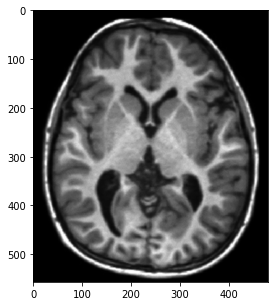

In [11]:
image = img.imread("./resources/brain.png")[:,:,:3]
print(image.shape)
image = color.rgb2gray(image)
print(image.shape)
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap="gray")

### Using the raw convolution operation

The raw convolution operation can be found at https://www.tensorflow.org/versions/r2.8/api_docs/python/tf/raw_ops/Conv2D.

In [12]:
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = sobel_x.reshape((3, 3, 1, 1))

sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = sobel_y.reshape((3, 3, 1, 1))

image = image.reshape(1, 557, 481, 1)

result_x = tf.raw_ops.Conv2D(
    input=image,
    filter=sobel_x,
    strides=[1,1,1,1],
    padding="SAME",
    use_cudnn_on_gpu=True,
    data_format='NHWC', # (1, 557, 481, 1)
)

result_y = tf.raw_ops.Conv2D(
    input=image,
    filter=sobel_y,
    strides=[1,1,1,1],
    padding="SAME",
    use_cudnn_on_gpu=True,
    data_format='NHWC', # (1, 557, 481, 1)
)

2022-11-09 15:12:15.047528: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101


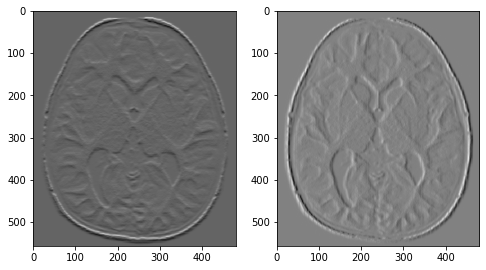

In [13]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(result_x[0,:,:,0], cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(result_y[0,:,:,0], cmap="gray")

plt.show()

-------------
# References:
- https://www.kdnuggets.com/2022/05/everything-need-know-tensors.html
- https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/
- https://www.tensorflow.org/tutorials/customization/basics
- https://stackabuse.com/understanding-tensorflows-tffunction-decorator/